In [96]:
import numpy as np
import pandas as pn
from math import pow

In [97]:
def addOne(arr):
    temp = np.ones([arr.shape[0],arr.shape[1] + 1])
    temp[...,1:] = arr
    return temp

In [98]:
def cost(X,Y,theta):
    m = len(Y)
    temp = (1/m)*(np.matmul(X,theta) - Y)**2
    return np.sum(temp)
    

In [99]:
#To check if values of linear regression are equal/almost equal
def normalEquation(X,Y):
    return np.matmul(np.linalg.inv(np.matmul(X.T,X)),np.matmul(X.T,Y))

In [100]:
def makeColsToRows(arr):
    size = arr.shape[0]
    arr.resize(size,1)
    return arr

In [101]:
def gradientDescent(X,Y,theta,alpha,iterations):
    m = Y.shape[0]
    costValues = []
    for i in range(iterations):
        theta -= (1/m)*alpha*np.matmul(X.T,(np.matmul(X,theta) - Y))
        costValues.append(cost(X,Y,theta))
    return [theta,costValues]

In [102]:
def scaleDown(X):
    means = []
    stds = []
    for i in range(X.shape[1]):
        tempMean = np.mean(X[...,i])
        tempStd = np.std(X[...,i])
        X[...,i] = (X[...,i] - tempMean)/tempStd
        means.append(tempMean)
        stds.append(tempStd)
        
    return [X,makeColsToRows(np.array(means)),makeColsToRows(np.array(stds))]

In [103]:
# Filter rows having blank values
def filter(dataset):
    temp = pn.DataFrame(dataset.values)
    return np.array(temp.dropna())

In [104]:
X = pn.read_csv('car_price.csv')

X = filter(X)

In [105]:
# Training result
Y = makeColsToRows(X[...,1])
#Deleting  Y from X
X = np.delete(X,1,1)
#Scaling down huge variation in values;
[X,means,stds] = scaleDown(X)
X = addOne(X)
print(X)

[[ 1.          0.00461211  1.34376809 ...  0.98620891 -0.41800262
  -0.43429672]
 [ 1.         -0.25402602  0.89471509 ...  0.86235118 -0.41800262
  -0.43429672]
 [ 1.         -0.51266416  0.89471509 ... -0.84193118 -0.16992987
   1.65006394]
 ...
 [ 1.         -0.7713023  -0.77822745 ...  1.6302691  -1.65638181
  -1.47647706]
 [ 1.         -1.28857858  0.54251666 ... -0.40099766 -0.41800262
  -0.43429672]
 [ 1.          1.03916466 -0.79583737 ...  1.23392437  0.07814289
  -0.43429672]]


In [106]:
#MAIN PROG
alpha = 0.003
iterations = 20000
theta = np.ones([X.shape[1],1])

[gradientTheta,allCosts] = gradientDescent(X,Y,theta,alpha,iterations)
normalTheta = normalEquation(X,Y)

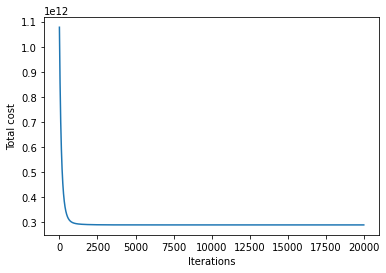

In [107]:
#Testing values;
from matplotlib import pyplot as plot

plot.plot(np.arange(iterations),allCosts)
plot.xlabel("Iterations")
plot.ylabel("Total cost")
plot.show()

